## 线性不可分

- 高斯核函数解决线性不可分问题，观察$\gamma$对模型复杂度的影响

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
data2 = sio.loadmat("./exp6data/exp6data2.mat")
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X, y = data2["X"], data2["y"]
X.shape, y.shape

((863, 2), (863, 1))

In [4]:
def plotData(X, y):
    plt.scatter(X[:,0], X[:,1],c = y.flatten(), cmap="rainbow")
    plt.xlabel("x1")
    plt.ylabel("x2")

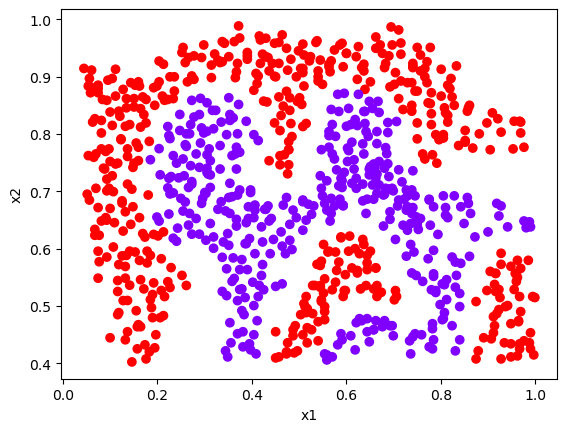

In [5]:
plotData(X, y)

In [6]:
svc1 = SVC(C=1, kernel="rbf", gamma=1000)
svc1.fit(X, y.flatten())

SVC(C=1, gamma=1000)

In [7]:
svc1.score(X, y.flatten())

1.0

In [8]:
X[:,0].max(), X[:,0].min(), X[:,1].max(), X[:,1].min()

(0.998848, 0.0449309, 0.988596, 0.402632)

In [9]:
def plotBoundary(model):
    x1_min, x1_max = 0.0, 1.1
    x2_min, x2_max = 0.3, 1.1

    xx, yy = np.meshgrid(np.linspace(x1_min, x2_max, 500),
                    np.linspace(x2_min, x2_max, 500))
    z = model.predict(np.c_[xx.flatten(), yy.flatten()])
    zz = z.reshape(xx.shape)
    plt.contour(xx, yy, zz)

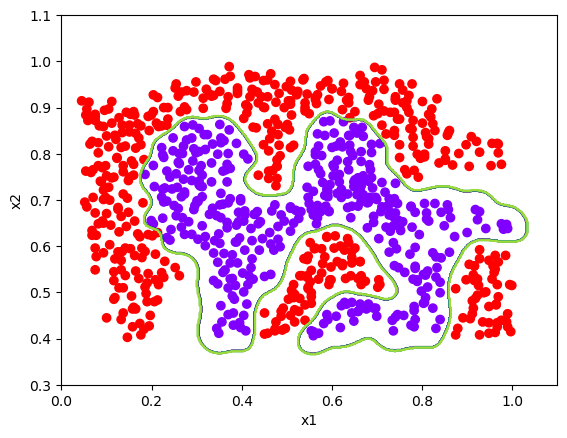

In [10]:
plotBoundary(svc1)
plotData(X, y)